In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# functions from cohort and homework week 9

def normalize_z(df):
    return ((df - df.mean(axis=0))/df.std(axis=0))

def get_features_targets(df, feature_names, target_names):
    # get df of selected features
    df_feature = df[feature_names]
    # get df of selected targets
    df_target = df[target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    # number of columns in the dataframe
    cols = len(df_feature.columns)
    # convert df to numpy
    feature = df_feature.to_numpy().reshape(-1,cols)
    array = np.concatenate((np.ones((feature.shape[0],1)), feature), axis = 1)
    return array

def prepare_target(df_target):
    cols = len(df_target.columns)
    target = df_target.to_numpy().reshape(-1,cols)
    return target

def predict(df_feature, beta):
    df_feature = normalize_z(df_feature)
    preped_feature = prepare_feature(df_feature)
    return predict_norm(preped_feature, beta)

def predict_norm(X, beta):
    return np.matmul(X,beta)

def split_data(df_feature, df_target, random_state=100, test_size=0.3):
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    k = int(test_size * len(indexes))
    test_index = np.random.choice(indexes, k, replace=False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    # the above indexes just helps you to get random indexes within the entire data
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    ss_res = np.sum((y-ypred)**2)
    y_mean = np.mean(y)
    ss_tot = np.sum((y-y_mean)**2)
    r_2 = (1-(ss_res/ss_tot))
    return r_2

def mean_squared_error(target, pred):
    num_data = target.shape[0]
    return (1/num_data)*(np.sum((target-pred)**2))

def mean_absolute_error(target,pred):
    num_data = target.shape[0]
    return (1/num_data)*(abs(np.sum(target-pred)))

def compute_cost(X, y, beta): #beta is weighted values, in this case it is just choosen from random values
    J = 0
    number_of_samples = X.shape[0]
    error = np.matmul(X, beta) - y
    error_sq = np.matmul(error.T, error)
    J = (1)/(2*number_of_samples) * error_sq 
    J = J[0][0]
    return J

def gradient_descent(X, y, beta, alpha, num_iters):
    number_of_samples = X.shape[0]
    J_storage = []
    for i in range(num_iters):
        derivative_error = (1/(number_of_samples)) * np.matmul(X.T, (np.matmul(X, beta) - y))
        beta = beta - alpha *  derivative_error
        J_storage.append(compute_cost(X, y, beta))
    return beta, J_storage

# single function to make the model
# @args
# 1. alpha-value (step for gradient descent)
# 2. beta (starting beta values for gradient descent)
# 3. iterations (number of iterations of gradient descent)
# 4. start (starting row)
# 5. end (last row)
# 6. feature_parameters (features used to train model)
# @return r^2 and mse values + mae value

def make_model_vs_excel(alpha, beta, iterations, feature_parameters = ["total_cases","new_cases_smoothed","total_cases_per_million","new_cases_smoothed_per_million","reproduction_rate","positive_rate"], dataset = "Data/Task 1/countries_covid_data_total_features_final_csv.csv" , target_column = ["new_deaths_smoothed"]):
    df = pd.read_csv(dataset)
    
    # Extract the features and the target
    df_features, df_target = get_features_targets(df,feature_parameters,target_column)

    # Split data into training and testing features and targets
    df_features_train = df_features.loc[0:2099]
    df_target_train = df_target.loc[0:2099]

    df_features_test = df_features.loc[2100:]
    df_target_test = df_target.loc[2100:]
    

    # Normalize the features using z normalization
    df_features_train_z = normalize_z(df_features_train)

    # Change the features and the target to numpy array using the prepare functions
    X = prepare_feature(df_features_train_z)
    target = prepare_target(df_target_train)

    # Call the gradient_descent function
    beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)


    # call the predict() method
    pred = predict(df_features_test,beta)

    target = prepare_target(df_target_test)

    r2 = r2_score(target,pred)
    mse = mean_squared_error(target, pred)
    mae = mean_absolute_error(target, pred)
    return r2, mse, mae, pred, df_target_test, df_features_test

In [6]:
# Calculate metrics for our model
r2, mse, mae, pred, target, df_features_test = make_model_vs_excel(0.01, np.zeros((7,1)),3300)
print(f"r^2 value = {r2}, mean squared error = {mse}, mean absolute error = {mae}")

r^2 value = 0.3774323914212877, mean squared error = 1017.3841131723741, mean absolute error = 9.01552090629809


Text(0, 0.5, 'New Deaths Smoothed')

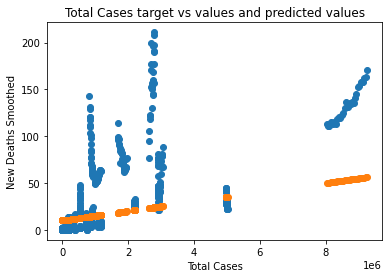

In [13]:
# Plot individual features against target values and predicted values

r2, mse, mae, pred, target, df_features_test = make_model_vs_excel(0.01, np.zeros((2,1)),3300, ["total_cases"])
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("Total Cases target vs values and predicted values")
plt.xlabel("Total Cases")
plt.ylabel("New Deaths Smoothed")


Text(0, 0.5, 'New Deaths Smoothed')

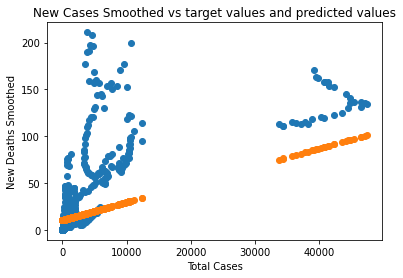

In [14]:
r2, mse, mae, pred, target, df_features_test = make_model_vs_excel(0.01, np.zeros((2,1)),3300, ["new_cases_smoothed"])
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("New Cases Smoothed vs target values and predicted values")
plt.xlabel("New Cases Smoothed")
plt.ylabel("New Deaths Smoothed")

Text(0, 0.5, 'New Deaths Smoothed')

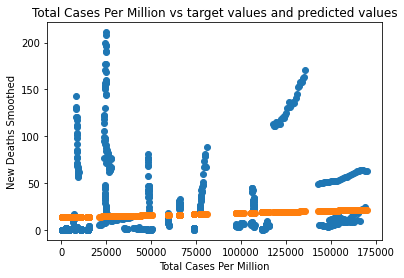

In [15]:
r2, mse, mae, pred, target, df_features_test = make_model_vs_excel(0.01, np.zeros((2,1)),3300, ["total_cases_per_million"])
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("Total Cases Per Million vs target values and predicted values")
plt.xlabel("Total Cases Per Million")
plt.ylabel("New Deaths Smoothed")

Text(0, 0.5, 'New Deaths Smoothed')

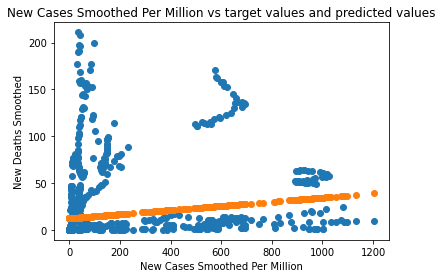

In [16]:
r2, mse, mae, pred, target, df_features_test = make_model_vs_excel(0.01, np.zeros((2,1)),3300, ["new_cases_smoothed_per_million"])
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("New Cases Smoothed Per Million vs target values and predicted values")
plt.xlabel("New Cases Smoothed Per Million")
plt.ylabel("New Deaths Smoothed")

Text(0, 0.5, 'New Deaths Smoothed')

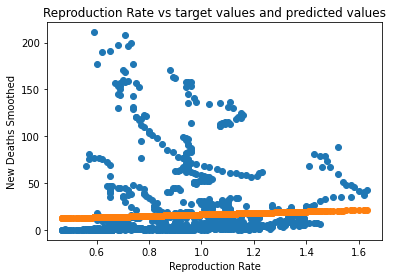

In [17]:
r2, mse, mae, pred, target, df_features_test = make_model_vs_excel(0.01, np.zeros((2,1)),3300, ["reproduction_rate"])
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("Reproduction Rate vs target values and predicted values")
plt.xlabel("Reproduction Rate")
plt.ylabel("New Deaths Smoothed")


Text(0, 0.5, 'New Deaths Smoothed')

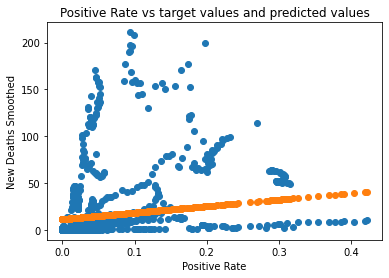

In [18]:
r2, mse, mae, pred, target, df_features_test = make_model_vs_excel(0.01, np.zeros((2,1)),3300, ["positive_rate"])
plt.scatter(x=df_features_test, y=target)
plt.scatter(x=df_features_test, y=pred)
plt.title("Positive Rate vs target values and predicted values")
plt.xlabel("Positive Rate")
plt.ylabel("New Deaths Smoothed")